# Exercice 1 : Régression de chenilles

Le dataset `pine_full` est tiré d'un article analysant des parcelles de terrain et le nombre de nids de chenilles processionnaires. Pour tenter d'expliquer ce nombre de nids pour une parcelle donnée, on considère les variables explicatives suivantes :

1. altitude (en mètres)
2. pente (en degres)
3. nombre de pins dans la parcelle
4. hauteur (en mètres) de l'arbre échantilloné au centre de la parcelle
5. diamètre (en mètres) de l'arbre échantilloné au centre de la parcelle
6. indice de la densité de population
7. orientation de la parcelle (1 plein sud jusqu'à 2 sinon)
8. hauteur (en mètres) de l'arbre dominant
9. Nombre de strates de végétation
10. Indice de mixité de la population (entre 1 (non mixte) et 2 (mixte))

La variable à expliquer est un logarithme appliqué au nombre moyen de nids de chenilles observés par arbre dans la parcelle.


## Chargement des données
Le code suivant permet de charger le dataset avec les variables explicatives dans `data_pine` et la propriété dans  `y_pine`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data_pine = np.loadtxt('pine_full.csv',delimiter=",")
y_pine = data_pine[:,-1]
data_pine = data_pine[:,:-1]


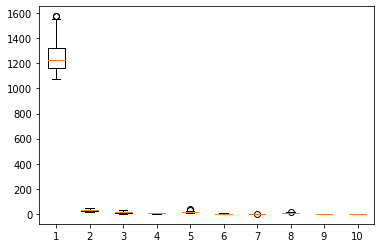

In [2]:
plt.boxplot(data_pine);

* Donnez le nombre d'observations ainsi que le nombre de variables explicatives à partir des données chargées

In [3]:
n,p = data_pine.shape
print(n,p)

58 10


* Calculez les covariances entre chaque variable explicative et la propriété à prédire. Quelles sont les variables  les plus prometteuses pour prédire le nombre de nids ?

array([-0.42934193, -0.28597597, -0.20753543, -0.03053795,  0.18922899,
       -0.19514481, -0.17313584, -0.30904139, -0.40388614, -0.31669936])

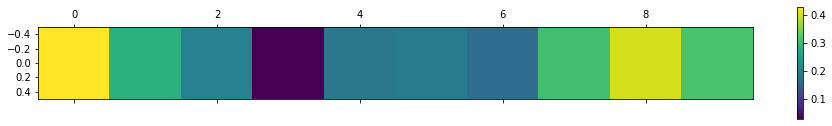

In [4]:
data_pine_norm = (data_pine - np.mean(data_pine,axis=0))/np.std(data_pine,axis=0)
y_norm = (y_pine-np.mean(y_pine))/np.std(y_pine)
cov_y = 1/n * data_pine_norm.T@y_norm
plt.matshow(np.abs(cov_y).reshape(1,-1))
plt.colorbar()
cov_y
#meilleur est 1 et 9 (0 et 8)

* Effectuez une régression sur ce jeu de données et donnez le $R^2$ associé

In [5]:
def reg(X,y):
    X=np.hstack([X,np.ones((n,1))])
    alpha = np.linalg.solve(X.T@X, X.T@y)
    z = X@alpha
    SCT = np.mean((y - np.mean(y))**2)
    SCM = np.mean((z-np.mean(y))**2)

    return SCM/SCT,alpha,z
R2,alpha,z =reg(data_pine,y_pine) 
print(R2)
#pas ouf

0.5813220444153613


* Calculez les résidus de votre modèle. Affichez les sous forme de nuage de points en fonction de `y`. Quel observation faites vous ? 

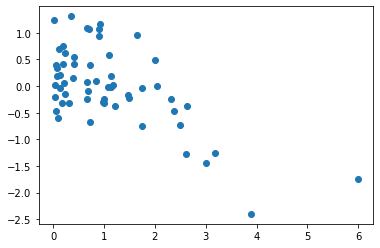

In [6]:
e = z-y_pine
plt.plot(y_pine,e,'o')

# variance pas équivalente, pb de y "loin"

* On décide d'analyser le problème. Calculez les effets leviers de chacune des observations. Détectez vous des points potentiellement problématiques ?

<BarContainer object of 58 artists>

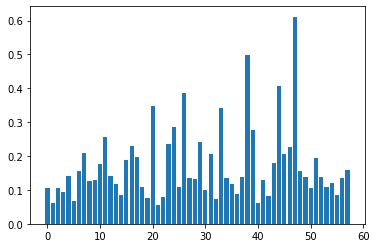

In [7]:
# leviers, contributions
H = data_pine@np.linalg.inv(data_pine.T@data_pine)@data_pine.T
h=np.diag(H)
plt.bar(range(n),h)
#Non

* Calculez les contributions de chaque observation ? Quelles remarques pouvez vous faire ?

In [ ]:
s2 = (1/(n-p)) * np.sum(e**2) 
c = (h / (p*(1-h)**2))*(e**2/s2)
plt.bar(range(n),c)
# probleme pour deux valeurs, elles correspondent aux y élevés ? oui !

In [ ]:
plt.plot(y_pine,c,'o')

* Afin d'améliorer les résultats, proposez et implémentez une méthode pour améliorer le $R^2$. Donnez le nouveau $R^2$ et portez un regard critique sur votre nouveau modèle.

In [ ]:
X_norm = (data_pine-np.mean(data_pine,axis=0)) / np.std(data_pine, axis=0)

X = np.hstack([X_norm,X_norm**(4)])
R2,alpha,z = reg(X,y_pine)
print(R2)

* Quel est le meilleur modèle à une seule variable ?

In [ ]:
R2s = []
for i in range(p):
    sub_X = data_pine[:,i].reshape(-1,1)
    R2,alpha,z = reg(sub_X,y_pine) 
    R2s.append(R2)
print(R2s)
print(np.max(R2s),np.argmax(R2s))

* Proposez le meilleur modèle possible avec un nombre de variables que vous déterminerez. Détaillez et justifier votre méthode

Les laisser faire sur celle là. La meilleur approche est d'utiliser le cp de mallows et une approche backward ou forward selection. 

## PizzACP

Le jeu de données suivant renseigne sur les données nutritionnelles de pizzas issues de 10 marques différentes. La variable `pizza_marques` code les différentes marques par un entier différent. La variable `pizza_data` contient les variables suivantes :
1. id - Sample analised
2. mois - Amount of water per 100 grams in the sample
3. prot - Amount of protein per 100 grams in the sample
4. fat - Amount of fat per 100 grams in the sample
5. ash - Amount of ash per 100 grams in the sample
6. sodium - Amount of sodium per 100 grams in the sample
7. carb - Amount of carbohydrates per 100 grams in the sample
8. cal - Amount of calories per 100 grams in the sample

On se propose d'effectuer une analyse descriptive de ce jeu de données via une ACP


In [1]:
import numpy as np
pizza_marques = np.loadtxt('pizza_marque.csv')
pizza_data = np.loadtxt('pizza_data.csv')

1. Parmi les données présentées, une variable devrait être supprimée avant tout calcul. Laquelle ? Supprimez cette colonne du jeu de données.

In [2]:
# supp de la premiere colonne
pizza_data=pizza_data[:,1:]
n,p = pizza_data.shape

2. Affichez la boite à moustaches des données. Quelle opération déduisez vous de cette observation ?

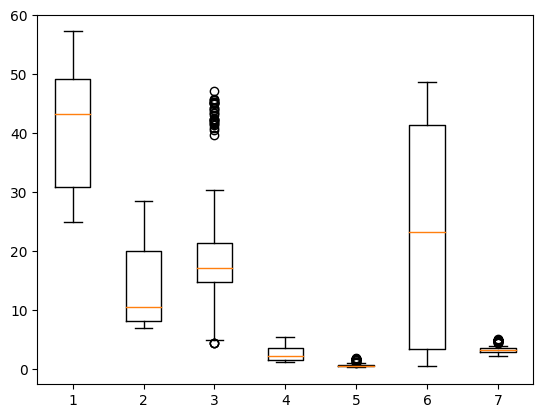

In [3]:
import matplotlib.pyplot as plt
plt.boxplot(pizza_data);

3. Normalisez les données

In [4]:
pizza_norm = (pizza_data-np.mean(pizza_data,axis=0))/np.std(pizza_data,axis=0)

4. Calculez et affichez la matrice de covariance. Est ce qu'elle vous parait cohérente ?


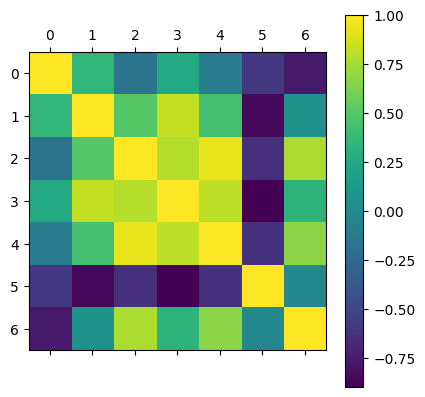

In [5]:
cov = (1/n) * (pizza_norm.T@pizza_norm)
plt.matshow(cov)
plt.colorbar()

5. Calculez les valeurs et vecteurs propres de la matrice de covariance. 

In [6]:
from scipy.linalg import eigh
w,v = eigh(cov)
w=w[::-1]
v=v[:,::-1]


6. Combien faut il d'axes factoriels au minimum pour représenter 90%  de l'information ? Pensez à justifier.

In [7]:
w.cumsum()/w.sum() > 0.9
#2

array([False,  True,  True,  True,  True,  True,  True])

7. Calculez la projection 2D des données selon l'ACP

In [8]:
pizza_proj = pizza_norm@v[:,:2]

8. Affichez les données projetées avec une couleur différente par étiquette (cf. Annexe, utilisez `plt.scatter`).Commentez le graphique obtenu

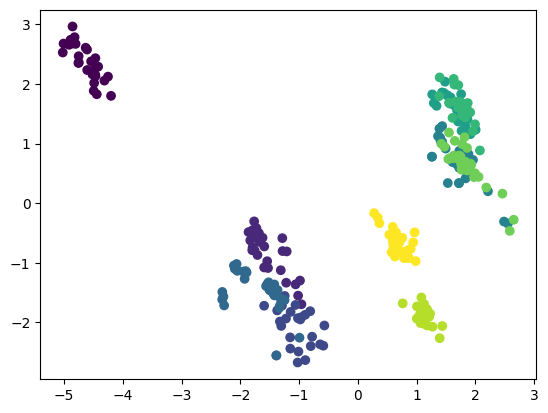

In [9]:
plt.scatter(pizza_proj[:,0],pizza_proj[:,1],c=pizza_marques)

9. Donnez les contributions de chaque variable au premier axe de l'ACP. Quelle la variable qui contribue le plus ? Comment interpréter vous cette contribution ?

In [10]:
v[:,0]

array([-0.06470937, -0.3787609 , -0.44666592, -0.47188953, -0.43570289,
        0.42491371, -0.2444873 ])

In [ ]:
#utilisation de plt.text
coords = np.random.rand(10,2)
plt.plot(coords[:,0],coords[:,1],'o')
for i,coord in enumerate(coords):
    print(coord)
    plt.text(coord[0],coord[1],i,fontsize='large')

### Formulaire

- Moyenne empirique: $\bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i $
- Variance empirique: $s^2_{x} = \frac{1}{n} \sum_{i = 1}^n (x_i  - \bar{x})^2$
- Covariance: $s_{jk} =  \frac{1}{n}    \sum_{i=1}^n  (x_{i,j}- \bar{x}_j)(x_{i,k}- \bar{x}_k)$
- Corrélation: $r_{j,k} = \frac{s_{jk}}{s_j s_k} $
- Variance totale: $s^2 = \sum_{i=1}^{n} (y_i - \bar{y})^2 = \sum_{j \in \Omega_x} \sum_{i=1}^{n_j} (y_{ij} -  \bar{y})^2 =
        s^2_{\textrm{inter}} + s^2_{\textrm{intra}}$
- Variance intra-classe: $s^2_{\textrm{intra}} = \sum_{j \in \Omega_x}\sum_{i=1}^{n_j} (y_{ij} - \bar{y_j})^2$
- Variance inter-classe: $s^2_{\textrm{inter}} =  \sum_{j \in \Omega_x}\sum_{i=1}^{n_j} (\bar{y_j} - \bar{y})^2 = \sum_{j \in\Omega_x} n_j (\bar{y_j} - \bar{y})^2$
- Rapport des variances: $\eta_{Y/X}^2 = \frac{s^2_{\textrm{inter}}}{s^2} = \frac{\sum_{j \in
          \Omega_x} n_j (\bar{y_j} - \bar{y})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
- Coefficient de corrélation:  $r = \frac{s_{xy}}{s_x s_y} = \frac{\frac{1}{n} \displaystyle \sum_{i=1}^{n} (x_i-\bar{x})(y_i - \bar{y})}{s_x s_y}  = 
\frac{( \sum_{i=1}^n x_i y_i) - n \bar{x} \bar{y}}{\sqrt{ \sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{ \sum_{i=1}^n (y_i - \bar{y})^2}}$
- Problème de la régression : $min_\alpha \| X \alpha - y \|^2_2$
- Paramètres de la régression $\alpha = (X^\top X )^{-1}X^\top y$
- Coefficient de détermination $R^2$ : $\frac{\sum_{i=1}^{n} (z_i - \bar{y})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
- Influence de l'observation $i$ : $H(i,i) = \|H(i,:)\|^2$ avec $H= X(X^\top X)^{-1}X^\top$
- Contribution de l'observation $i$ (Distance de Cook) : $c_i = \frac{H_{ii}}{p(1 - H_{ii})^2} \frac{\varepsilon_i^2}{s^2}$ avec $p$ le nombre de dimensions et $s^2 = \frac{1}{n-p} \sum_{i=1}^n \varepsilon_i^2 $ 
- $C_p$ de Mallows : $Cp = \frac{1}{s^2} \sum_{i=1}^n (y_i - z_i^{(0)})^2 -n + 2 p_0$ avec $s^2 = \frac{1}{n-p} \sum_{i=1}^n (y_i - z_i)^2$ et $z_i^{(0)}$ l'estimation de $y_i$ faite avec la sous matrice $X^{(0)} \in \mathbb{R}^{n \times p_0}$
- Distance du $\chi^2$ : $ D(O,T) = \sum_{i=1}^I \sum_{j=1}^J \frac{(O_{ij} - T_{ij})^2}{T_{ij}} $